<a href="https://colab.research.google.com/github/leegaon0622/Bigdata/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_02%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
import urllib.request
import datetime
import time
import json


client_id = 'V6nPA1V35ZBxE7lOr9r5'
client_secret = '6m9FCOIYT6'



#[CODE 1]
def getRequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

#[CODE 2]
def getNaverSearch(node, srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)

    url = base + node + parameters
    responseDecode = getRequestUrl(url)   #[CODE 1]

    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def getPostData(post, jsonResult, cnt):
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']

    pDate = datetime.datetime.strptime(post['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')

    jsonResult.append({'cnt':cnt, 'title':title, 'description': description,
'org_link':org_link,   'link': org_link,   'pDate':pDate})
    return

#[CODE 0]
def main():
    node = 'news'   # 크롤링 할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100)  #[CODE 2]
    total = jsonResponse['total']

    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)  #[CODE 3]

        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)  #[CODE 2]

    print('전체 검색 : %d 건' %total)

    with open('%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)

        outfile.write(jsonFile)

    print("가져온 데이터 : %d 건" %(cnt))
    print ('%s_naver_%s.json SAVED' % (srcText, node))

if __name__ == '__main__':
    main()

검색어를 입력하세요: 태풍
[2022-09-05 05:24:59.643877] Url Request Success
[2022-09-05 05:25:00.942746] Url Request Success
[2022-09-05 05:25:02.246093] Url Request Success
[2022-09-05 05:25:03.542668] Url Request Success
[2022-09-05 05:25:04.825807] Url Request Success
[2022-09-05 05:25:06.120116] Url Request Success
[2022-09-05 05:25:07.419670] Url Request Success
[2022-09-05 05:25:08.702344] Url Request Success
[2022-09-05 05:25:10.006211] Url Request Success
[2022-09-05 05:25:11.328755] Url Request Success
HTTP Error 400: Bad Request
[2022-09-05 05:25:12.311049] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%ED%83%9C%ED%92%8D&start=1001&display=100
전체 검색 : 959849 건
가져온 데이터 : 1000 건
태풍_naver_news.json SAVED


태풍 : 1732
힌남노 : 1092
북상 : 619
오전 : 311
대비 : 275
피해 : 261
영향 : 205
제주 : 199
서울 : 190
중인 : 181
오후 : 171
뉴스 : 167
상황 : 150
결항 : 149
가운데 : 146
점검 : 137
지역 : 126
안전 : 119
한반도 : 116
재난 : 113
부산 : 113
기상청 : 112
회의 : 111
대책 : 102
상륙 : 101
예상 : 101
강풍 : 98
비상 : 96
대응 : 95
사진 : 93
국제공항 : 91
국내선 : 90
강서구 : 88
기자 : 87
경남 : 86
항공 : 78
뉴시스 : 77
지난 : 77
공감 : 75
언론 : 75
위해 : 74
독자 : 72
여러분 : 70
시장 : 68
특보 : 67
현재 : 66
제주도 : 66
제보 : 63
청사 : 63
우려 : 62
김포 : 61
본부 : 57
현장 : 56
발생 : 56
김포공항 : 56
전국 : 55
단계 : 55
이번 : 55
모습 : 55
제공 : 54
경보 : 54
내일 : 50
최소 : 49
시설 : 49
기준 : 49
해상 : 49
전남 : 49


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_

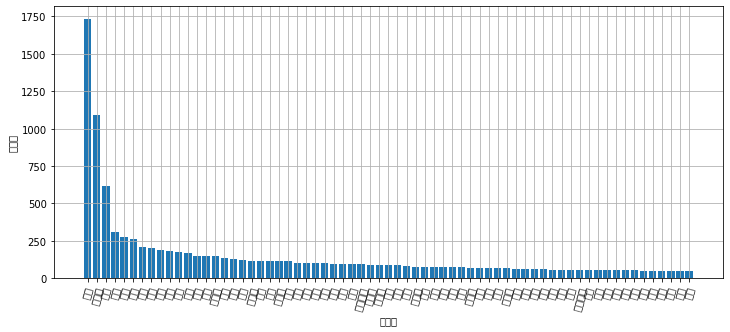

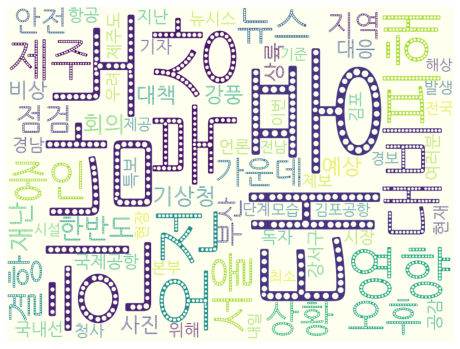

In [ ]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

# 1. 데이터 준비

### 1-1. 파일 읽기

inputFileName = 'task-1'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data #출력하여 내용 확인

### 1-2. 분석할 데이터 추출

message = ''

for item in data:
#    if 'message' in item.keys():
#        message = message + re.sub(r'[^\w]', ' ', item['message']) +''
    if 'description' in item.keys():
        message = message + re.sub(r'[^\w]', ' ', item['description']) +''

message #출력하여 내용 확인

### 1-3. 품사 태깅 : 명사 추출

nlp = Okt()
message_N = nlp.nouns(message)
message_N   #출력하여 내용 확인

## 2. 데이터 탐색

### 2-1. 단어 빈도 탐색

count = Counter(message_N)

count   #출력하여 내용 확인

word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

### 히스토그램


!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
font_path = "/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf"
font_name = fm.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)
fm._rebuild()

plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

### 워드클라우드

wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

cloud.to_file(inputFileName + '_cloud.jpg')




In [ ]:
import os
import sys
import urllib.request
import datetime
import time
import json
import pandas as pd


ServiceKey="tIvLzuMkhFV3WZ%2BN9NBd0l%2FLkwLTC6924PdQtg8XZttonfrZQRJNV5D75zoRD5yd0nFVpjchaqUAtGFMtO0g4w%3D%3D"
#ServiceKey="Ody77GLuYeR%2FeFqbpduMN2Bi4Cka2fztbgnj6E2Eux1kUhy3e4epR28XKBUaObiqPoVzAizxXMBPXtMyuC9v9Q%3D%3D"

#[CODE 1]
def getRequestUrl(url):
    req = urllib.request.Request(url)
    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None


#[CODE 2]
def getTourismStatsItem(yyyymm, national_code, ed_cd):
    service_url = " "
    parameters = "?_type=json&serviceKey=" + ServiceKey   #인증키
    parameters += "&YM=" + yyyymm
    parameters += "&NAT_CD=" + national_code
    parameters += "&ED_CD=" + ed_cd
    url = service_url + parameters

    retData = getRequestUrl(url)   #[CODE 1]

    if (retData == None):
        return None
    else:
         return json.loads(retData)

#[CODE 3]
def getTourismStatsService(nat_cd, ed_cd, nStartYear, nEndYear):
    jsonResult = []
    result = []
    natName=''
    dataEND = "{0}{1:0>2}".format(str(nEndYear), str(12)) #데이터 끝 초기화
    isDataEnd = 0 #데이터 끝 확인용 flag 초기화

    for year in range(nStartYear, nEndYear+1):
        for month in range(1, 13):
            if(isDataEnd == 1): break #데이터 끝 flag 설정되어있으면 작업 중지.
            yyyymm = "{0}{1:0>2}".format(str(year), str(month))
            jsonData = getTourismStatsItem(yyyymm, nat_cd, ed_cd) #[CODE 2]

            if (jsonData['response']['header']['resultMsg'] == 'OK'):
                # 입력된 범위까지 수집하지 않았지만, 더이상 제공되는 데이터가 없는 마지막 항목인 경우 -------------------
                if jsonData['response']['body']['items'] == '':
                    isDataEnd = 1 #데이터 끝 flag 설정
                    dataEND = "{0}{1:0>2}".format(str(year), str(month-1))
                    print("데이터 없음.... \n 제공되는 통계 데이터는 %s년 %s월까지입니다."
                          %(str(year), str(month-1)))
                    break
                #jsonData를 출력하여 확인......................................................
                print (json.dumps(jsonData, indent=4,
                         sort_keys=True, ensure_ascii=False))
                natName = jsonData['response']['body']['items']['item']['natKorNm']
                natName = natName.replace(' ', '')
                num = jsonData['response']['body']['items']['item']['num']
                ed = jsonData['response']['body']['items']['item']['ed']
                print('[ %s_%s : %s ]' %(natName, yyyymm, num))
                print('----------------------------------------------------------------------')
                jsonResult.append({'nat_name': natName, 'nat_cd': nat_cd,
                                 'yyyymm': yyyymm, 'visit_cnt': num})
                result.append([natName, nat_cd, yyyymm, num])

    return (jsonResult, result, natName, ed, dataEND)

#[CODE 0]
def main():
    jsonResult = []
    result = []
    natName=''
    print("<< 국내 입국한 외국인의 통계 데이터를 수집합니다. >>")
    nat_cd = input('국가 코드를 입력하세요(중국: 112 / 일본: 130 / 미국: 275) : ')
    nStartYear =int(input('데이터를 몇 년부터 수집할까요? : '))
    nEndYear = int(input('데이터를 몇 년까지 수집할까요? : '))
    ed_cd = "E"     #E : 방한외래관광객, D : 해외 출국

    jsonResult, result, natName, ed, dataEND =getTourismStatsService(nat_cd,
                                            ed_cd, nStartYear, nEndYear) #[CODE 3]

    if (natName=='') : #URL 요청은 성공하였지만, 데이터 제공이 안된 경우
        print('데이터가 전달되지 않았습니다. 공공데이터포털의 서비스 상태를 확인하기 바랍니다.')
    else:
        #파일저장 1 : json 파일
        with open('./%s_%s_%d_%s.json' % (natName, ed, nStartYear, dataEND), 'w',
                    encoding='utf8') as outfile:
            jsonFile  = json.dumps(jsonResult, indent=4, sort_keys=True, ensure_ascii=False)
            outfile.write(jsonFile)
        #파일저장 2 : csv 파일
        columns = ["입국자국가", "국가코드", "입국연월", "입국자 수"]
        result_df = pd.DataFrame(result, columns = columns)
        result_df.to_csv('./%s_%s_%d_%s.csv' % (natName, ed, nStartYear, dataEND),
                    index=False, encoding='cp949')

if __name__ == '__main__':
    main()

<< 국내 입국한 외국인의 통계 데이터를 수집합니다. >>
국가 코드를 입력하세요(중국: 112 / 일본: 130 / 미국: 275) : 112
데이터를 몇 년부터 수집할까요? : 2019
데이터를 몇 년까지 수집할까요? : 2021


ValueError: ignored

In [ ]:
import os
import sys
import urllib.request
import datetime
import time
import json
import pandas as pd

ServiceKey="Ody77GLuYeR%2FeFqbpduMN2Bi4Cka2fztbgnj6E2Eux1kUhy3e4epR28XKBUaObiqPoVzAizxXMBPXtMyuC9v9Q%3D%3D"

#[CODE 1]
def getRequestUrl(url):
    req = urllib.request.Request(url)
    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None


#[CODE 2]
def getTourismStatsItem(yyyymm, national_code, ed_cd):
    service_url = "http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList"
    parameters = "?_type=json&serviceKey=" + ServiceKey   #인증키
    parameters += "&YM=" + yyyymm
    parameters += "&NAT_CD=" + national_code
    parameters += "&ED_CD=" + ed_cd
    url = service_url + parameters

    retData = getRequestUrl(url)   #[CODE 1]

    if (retData == None):
        return None
    else:
         return json.loads(retData)

#[CODE 3]
def getTourismStatsService(nat_cd, ed_cd, nStartYear, nEndYear):
    jsonResult = []
    result = []
    natName=''
    dataEND = "{0}{1:0>2}".format(str(nEndYear), str(12)) #데이터 끝 초기화
    isDataEnd = 0 #데이터 끝 확인용 flag 초기화

    for year in range(nStartYear, nEndYear+1):
        for month in range(1, 13):
            if(isDataEnd == 1): break #데이터 끝 flag 설정되어있으면 작업 중지.
            yyyymm = "{0}{1:0>2}".format(str(year), str(month))
            jsonData = getTourismStatsItem(yyyymm, nat_cd, ed_cd) #[CODE 2]

            if (jsonData['response']['header']['resultMsg'] == 'OK'):
                # 입력된 범위까지 수집하지 않았지만, 더이상 제공되는 데이터가 없는 마지막 항목인 경우 -------------------
                if jsonData['response']['body']['items'] == '':
                    isDataEnd = 1 #데이터 끝 flag 설정
                    dataEND = "{0}{1:0>2}".format(str(year), str(month-1))
                    print("데이터 없음.... \n 제공되는 통계 데이터는 %s년 %s월까지입니다."
                          %(str(year), str(month-1)))
                    break
                #jsonData를 출력하여 확인......................................................
                print (json.dumps(jsonData, indent=4,
                         sort_keys=True, ensure_ascii=False))
                natName = jsonData['response']['body']['items']['item']['natKorNm']
                natName = natName.replace(' ', '')
                num = jsonData['response']['body']['items']['item']['num']
                ed = jsonData['response']['body']['items']['item']['ed']
                print('[ %s_%s : %s ]' %(natName, yyyymm, num))
                print('----------------------------------------------------------------------')
                jsonResult.append({'nat_name': natName, 'nat_cd': nat_cd,
                                 'yyyymm': yyyymm, 'visit_cnt': num})
                result.append([natName, nat_cd, yyyymm, num])

    return (jsonResult, result, natName, ed, dataEND)

#[CODE 0]
def main():
    jsonResult = []
    result = []
    natName=''
    print("<< 국내 입국한 외국인의 통계 데이터를 수집합니다. >>")
    nat_cd = input('국가 코드를 입력하세요(중국: 112 / 일본: 130 / 미국: 275) : ')
    nStartYear =int(input('데이터를 몇 년부터 수집할까요? : '))
    nEndYear = int(input('데이터를 몇 년까지 수집할까요? : '))
    ed_cd = "E"     #E : 방한외래관광객, D : 해외 출국

    jsonResult, result, natName, ed, dataEND =getTourismStatsService(nat_cd,
                                            ed_cd, nStartYear, nEndYear) #[CODE 3]

    if (natName=='') : #URL 요청은 성공하였지만, 데이터 제공이 안된 경우
        print('데이터가 전달되지 않았습니다. 공공데이터포털의 서비스 상태를 확인하기 바랍니다.')
    else:
        #파일저장 1 : json 파일
        with open('./%s_%s_%d_%s.json' % (natName, ed, nStartYear, dataEND), 'w',
                    encoding='utf8') as outfile:
            jsonFile  = json.dumps(jsonResult, indent=4, sort_keys=True, ensure_ascii=False)
            outfile.write(jsonFile)
        #파일저장 2 : csv 파일
        columns = ["입국자국가", "국가코드", "입국연월", "입국자 수"]
        result_df = pd.DataFrame(result, columns = columns)
        result_df.to_csv('./%s_%s_%d_%s.csv' % (natName, ed, nStartYear, dataEND),
                    index=False, encoding='cp949')

if __name__ == '__main__':
    main()


<< 국내 입국한 외국인의 통계 데이터를 수집합니다. >>
국가 코드를 입력하세요(중국: 112 / 일본: 130 / 미국: 275) : 130
데이터를 몇 년부터 수집할까요? : 2019
데이터를 몇 년까지 수집할까요? : 2021
<urlopen error [Errno 110] Connection timed out>
[2022-09-06 04:58:44.221121] Error for URL : http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList?_type=json&serviceKey=Ody77GLuYeR%2FeFqbpduMN2Bi4Cka2fztbgnj6E2Eux1kUhy3e4epR28XKBUaObiqPoVzAizxXMBPXtMyuC9v9Q%3D%3D&YM=201901&NAT_CD=130&ED_CD=E


TypeError: ignored

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

#[CODE 1]
def hollys_store(result):
    for page in range(1,11):

        Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore.do?pageNo=%d&sido=&gugun=&store=' %page
        print(Hollys_url)
        html = urllib.request.urlopen(Hollys_url)
        soupHollys = BeautifulSoup(html, 'html.parser')
        tag_tbody = soupHollys.find('tbody')
        for store in tag_tbody.find_all('tr'):
            if len(store) <= 3:
                break
            store_td = store.find_all('td')
            store_name = store_td[1].string
            store_sido = store_td[0].string
            store_address = store_td[3].string
            store_phone = store_td[5].string
            result.append([store_name]+[store_sido]+[store_address]
                          +[store_phone])
    return

#[CODE 0]
def main():
    result = []
    print('Hollys store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>')
    hollys_store(result)   #[CODE 1] 호출
    hollys_tbl = pd.DataFrame(result, columns=('store', 'sido-gu', 'address','phone'))
    hollys_tbl.to_csv('./hollys.csv', encoding='cp949', mode='w', index=True)
    del result[:]

if __name__ == '__main__':
     main()


Hollys store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=1&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=2&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=3&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=4&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=5&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=6&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=7&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=8&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=9&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=10&sido=&gugun=&store=
